In [1]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from __future__ import print_function
import librosa
import numpy as np
import matplotlib.pyplot as plt
from librosa import display,core
from dtw import dtw
from numpy import linalg as LA
from math import sqrt
from scipy import stats
from sklearn import svm
from sklearn.svm import SVR
from mlxtend.plotting import plot_decision_regions
import matplotlib.patches as mpatches
from sklearn.model_selection import cross_val_predict, cross_val_score,cross_validate
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from collections import Counter

from imblearn.over_sampling import RandomOverSampler
#%matplotlib inline

/Users/dweepa/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Link
https://www.researchgate.net/post/How_can_I_select_13_MFCC_coefficients

In [2]:
def accuracy(prediction,actual):
    count=0
    l=len(prediction)
    for i in range(l):
        if(prediction[i]==actual[i]):
            count+=1
    return count/l*100

In [3]:
def createTrainingData(start, end):
    samples = []
    l1=[376,248,251]
    l2=[334,339,294]
    
    for q,r in zip (l1,l2):
       
        for i in range(1,10):
            ind=0
            am=0
            try: 
                a,s=librosa.load("../Indian/p"+str(q)+"_00"+str(i)+".wav")
            except:
                ind=1
            try:
                b,t=librosa.load("../American/p"+str(r)+"_00"+str(i)+".wav")
            except:
                am=1
            if(ind==0 and am==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp1=mfcc1.T[1][start:end]
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp1,1])
                samples.append([temp2,0])              
                print('*', end=' ')
                
            elif(ind==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                temp1=mfcc1.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                samples.append([temp1,1])            
                print('$', end=' ')
            elif(am==0):
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp2,0])            
                print('#', end=' ')
            else: continue
        print('\n')
        for i in range(10,100):
            ind=0
            am=0
            try: 
                a,s=librosa.load("../Indian/p"+str(q)+"_0"+str(i)+".wav")
            except:
                ind=1
            try:
                b,t=librosa.load("../American/p"+str(r)+"_0"+str(i)+".wav")
            except:
                am=1
            if(ind==0 and am==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp1=mfcc1.T[1][start:end]
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp1,1])
                samples.append([temp2,0])              
                print('*', end=' ')
                
            elif(ind==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                temp1=mfcc1.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                samples.append([temp1,1])            
                print('$', end=' ')
            elif(am==0):
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp2,0])            
                print('#', end=' ')
            else: continue
        print('\n')
        for i in range(100,430):
            ind=0
            am=0
            try: 
                a,s=librosa.load("../Indian/p"+str(q)+"_"+str(i)+".wav")
            except:
                ind=1
            try:
                b,t=librosa.load("../American/p"+str(r)+"_"+str(i)+".wav")
            except:
                am=1
            if(ind==0 and am==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp1=mfcc1.T[1][start:end]
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp1,1])
                samples.append([temp2,0])              
                print('*', end=' ')
                
            elif(ind==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                temp1=mfcc1.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                samples.append([temp1,1])            
                print('$', end=' ')
            elif(am==0):
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp2,0])            
                print('#', end=' ')
            else: continue
        print('\n')
   
    print(len(samples))
    X = [i[0] for i in samples]
    Y = [j[1] for j in samples]
    return X,Y

def concatfeatures(realdata, mfcc1):
    temp1=mfcc1.T[1][1:19]
    for frame in range(10,50):
        temp1=np.concatenate((temp1,mfcc1.T[frame][1:19]))
    #print(temp1)
    realdata.append(temp1)
    
def concatfeatures1(realdata, mfcc1):
    temp1=mfcc1.T[1][1:13]
    for frame in range(10,50):
        temp1=np.concatenate((temp1,mfcc1.T[frame][1:13]))
    #print(temp1)
    realdata.append(temp1)

In [4]:
clf4 = svm.SVC()
data,label = createTrainingData(1,19)
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2)

* * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * # * * * * * * * * * * * * * * # * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * $ * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * # * * * * * * * * * * * * * * # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

* * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

In [5]:
Counter(label)

Counter({0: 1269, 1: 1032})

In [6]:
X_train, X_test, y_train, y_test  = train_test_split(data,label)
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 964), (1, 964)]


In [7]:
clf = svm.SVC()
clf.fit(X_resampled,y_resampled)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy(y_pred,y_test))

/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 53.645833333333336


In [8]:
confusion_matrix(y_test, y_pred.round())

array([[305,   0],
       [267,   4]])

In [9]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred.round()).ravel()
(tn, fp, fn, tp)

(305, 0, 267, 4)

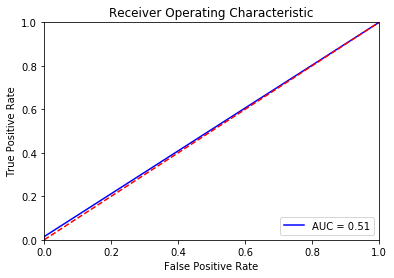

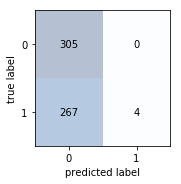

In [10]:
def plotCurve(y_test1,y_pred,name):   
    fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    name = '../'+name+'.png'
    plt.savefig(name)
    plt.show()
    return roc_auc
auc = plotCurve(y_test,y_pred.round(),'svm-aoc')

binary = confusion_matrix(y_test,y_pred.round())
fig, ax = plot_confusion_matrix(conf_mat=binary)
n = '../svm.png'
plt.savefig(n)
plt.show()

In [11]:
precision = round(tp/(tp+fp),2)
recall = round(tp/(tp+fn),2)
fmeasure = round(2*((precision*recall)/(precision+recall)),2)
rej = round(tn/(tn+fp),2)
acc = round((tn+tp)/(tn+tp+fp+fn),2)

In [12]:
print(precision,recall,fmeasure,rej,acc)

1.0 0.01 0.02 1.0 0.54


In [13]:
clf=svm.SVC()
scores = cross_val_score(clf, data, label, cv=10, scoring='f1_macro')
scores.mean(),scores.std()              

/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will chan

(0.3616720159434137, 0.013028267163450302)